In [1]:
W1 = '/artic/t-kaneko/work/val_bit_serial/numpy/data/pollux01/201217/201217_1527_resnet18_cifar100_ser_8_h1_201214_1941.npy'
W2 = '/artic/t-kaneko/work/val_bit_serial/numpy/data/pollux01/201217/201217_1528_resnet18_cifar100_ser_8_h2_201214_2014.npy'
W3 = '/artic/t-kaneko/work/val_bit_serial/numpy/data/pollux01/201217/201217_1529_resnet18_cifar100_ser_8_h3_201214_2046.npy'
W4 = '/artic/t-kaneko/work/val_bit_serial/numpy/data/pollux01/201217/201217_1529_resnet18_cifar100_ser_8_h4_201214_2057.npy'
W5 = '/artic/t-kaneko/work/val_bit_serial/numpy/data/pollux01/201217/201217_1530_resnet18_cifar100_ser_8_h5_201214_2108.npy'
W6 = '/artic/t-kaneko/work/val_bit_serial/numpy/data/pollux01/201217/201217_1530_resnet18_cifar100_ser_8_h6_201214_2119.npy'
W7 = '/artic/t-kaneko/work/val_bit_serial/numpy/data/pollux01/201217/201217_1531_resnet18_cifar100_ser_8_h7_201214_2131.npy'
W8 = '/artic/t-kaneko/work/val_bit_serial/numpy/data/pollux01/201217/201217_1532_resnet18_cifar100_ser_8_h8_201214_2142.npy'



Bad key "text.kerning_factor" on line 4 in
/opt/conda/lib/python3.6/site-packages/matplotlib/mpl-data/stylelib/_classic_test_patch.mplstyle.
You probably need to get an updated matplotlibrc file from
https://github.com/matplotlib/matplotlib/blob/v3.1.3/matplotlibrc.template
or from the matplotlib source distribution


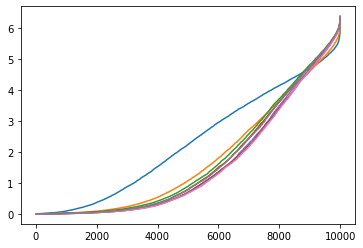

In [2]:
import numpy as np
import matplotlib.pyplot as plt
orig_list = []
sorted_list = []
for i in range(8):
    exec('orig = np.load(W%s)' % (i + 1))
    orig_list.append(orig)

for l in orig_list: 
    sort = np.zeros_like(l)
    sort = l[:, np.argsort(l[0])]
    sorted_list.append(sort.copy())
for s in sorted_list:
    plt.plot(s[0])

In [3]:
cum_list = np.zeros_like(sorted_list)
correct_rate = []
correct_list = []
bit = 1
for sl in sorted_list:
    cum_c = np.cumsum(sl[1][-2000:])
    cum_i = np.cumsum(sl[2][-2000:])
    for (x, y) in zip(cum_c, cum_i):
        r = x / (x + y)
        correct_rate.append(r.copy())
    correct_list.append(correct_rate.copy())
    correct_rate = []
    bit += 1

print(np.shape(cum_list))

(8, 3, 10000)


In [4]:
import matplotlib.pyplot as plt
# x_axi = np.arange(2000)
# plt.figure()
# plt.title('last 2000 images')
# plt.xlabel('Image number')
# plt.ylabel('dif-correct rate')
# for i in range(1, 5):
#     plt.plot(x_axi, np.array(correct_list[i]) - np.array(correct_list[0]), label='{} - 1bit'.format(i+1))
# plt.axhline(0.15, 0, 2000, color='black', linestyle="dashed")
# plt.ylim([0.05, 0.30])
# plt.legend()
# plt.show()

In [5]:
cum = np.zeros((8, 7))
total = np.zeros((8, 7))
count = 0
# cum = np.zeros((8,10000))
# for i, s in enumerate(sorted_list):
# #     tmp_cum = np.zeros(10000)
#     for j in range(1, 10000):
#         tmp_cum = np.cumsum(s[1])
#         cum[i][j] = tmp_cum[j] / j
# print(tmp_cum[0])
# plt.plot(cum[0])        

for s in sorted_list:
    for i in range(10000):
        tmp = s[0][i]
        if 0<= tmp < 1:
            cum[count][0] += s[1][i]
            total[count][0] += 1
        elif tmp < 2:
            cum[count][1] += s[1][i]
            total[count][1] += 1
        elif tmp < 3:
            cum[count][2] += s[1][i]
            total[count][2] += 1
        elif tmp < 4:
            cum[count][3] += s[1][i]
            total[count][3] += 1
        elif tmp < 5:
            cum[count][4] += s[1][i]
            total[count][4] += 1
        elif tmp < 6:
            cum[count][5] += s[1][i]
            total[count][5] += 1
        else:
            cum[count][6] += s[1][i]
            total[count][6] += 1
    count +=1

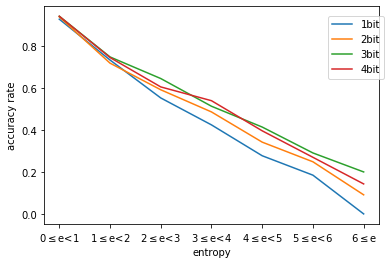

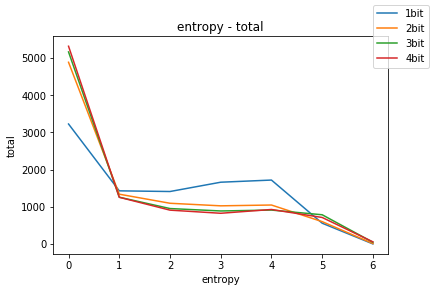

In [40]:
fig1 = plt.figure()
fig2 = plt.figure() 
ax1 = fig1.add_subplot(111)
ax2 = fig2.add_subplot(111)

for i in range(4):
#     exec("ax1.plot(sorted_list[{}][0], cum[{}], label='{}bit')".format(i, i, i+1))
    exec("ax1.plot(cum[{}]/total[{}], label='{}bit')".format(i, i, i+1))
    exec("ax2.plot(total[{}], label='{}bit')".format(i, i+1))
# ax1.set_title('entropy - cumsum')
ax1.set_xlabel('entropy')
ax1.set_ylabel('accuracy rate')
ax1.set_xticks([0,1,2,3,4,5,6])
ax1.set_xticklabels(['0$\leq$e<1', '1$\leq$e<2', '2$\leq$e<3', '3$\leq$e<4', '4$\leq$e<5', '5$\leq$e<6', '6$\leq$e' ])
ax2.set_title('entropy - total')
ax2.set_xlabel('entropy')
ax2.set_ylabel('total')
# fig1.legend(bbox_to_anchor=(1, 1), loc='upper right')
fig1.legend(bbox_to_anchor=(0.9,0.88))
fig1.show()
fig2.legend()
fig2.show()
fig1.savefig('fig/ent_acc_cum.pdf')

In [7]:
sort_list = []
for i in range(8):
    index = orig_list[i][0].argsort()
    sort_list_i = []
    sort = np.zeros_like(orig_list[i])
    for l in orig_list:
        sort = l[:, index]
        sort_list_i.append(sort.copy())
    sort_list.append(sort_list_i)

print(np.shape(sort_list))

(8, 8, 3, 10000)


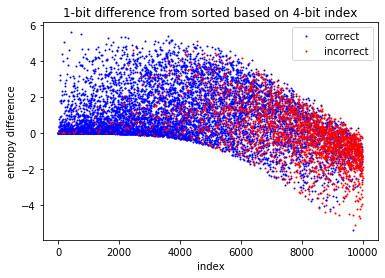

(7503,)
0 0


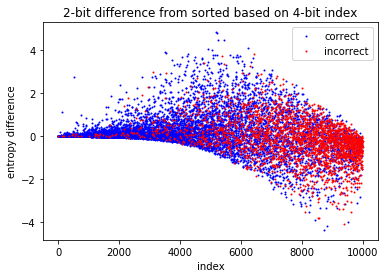

(7503,)
0 0


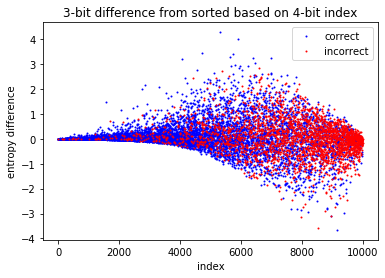

(7503,)
0 0


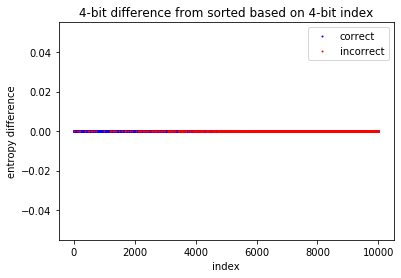

(7503,)
0 0


In [8]:
# n+1ビットのindexをもとに1~3bitをソートしたものとの差分
n = 3
for i in range(4):
    correct = [[], []]
    incorrect = [[], []]
    for j in range(10000):
        if sort_list[n][n][1][j] == 1:
            correct[0].append(sort_list[n][i][0][j] - sort_list[n][n][0][j])
            correct[1].append(j)
        elif sort_list[n][n][1][j] == 0:
            incorrect[0].append(sort_list[n][i][0][j] - sort_list[n][n][0][j])
            incorrect[1].append(j)
    plt.plot(correct[1], correct[0], label='correct', color='blue', linewidth=0, marker='o', markersize=1)
    plt.plot(incorrect[1], incorrect[0], label='incorrect', color='red', linewidth=0, marker='o', markersize=1)
#     plt.plot(sort_list[7][7][0] - sort_list[7][i][0], linewidth=0, marker='o', markersize=1)    
    plt.title("%s-bit difference from sorted based on %s-bit index" % (i+1, n+1))
    plt.xlabel('index')
    plt.ylabel('entropy difference')
    plt.legend()
#     plt.ylim([-2,2])
#     if save:
#         plt.savefig("fig/prediff_%s-based1bit.png" % (i+2))
    plt.show()  
    pp = 0
    nn = 0
    print(np.shape(correct[0]))
    for k in range(len(correct[0])):
        if (0.75 < correct[0][k] < 1.25) and (correct[1][k]>9500):
            pp +=1
    for l in range(len(incorrect[0])):
        if (0.75 < incorrect[0][l] < 1.25) and (incorrect[1][l]>9500):
            nn += 1
    print(pp, nn)

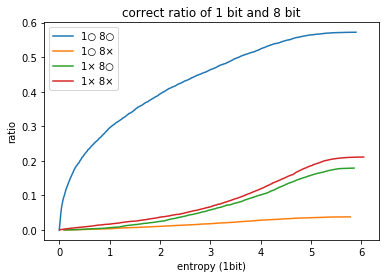

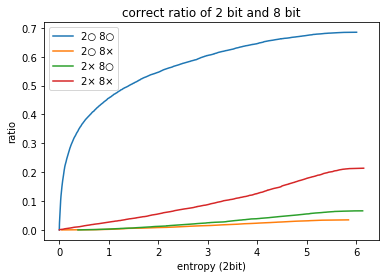

In [9]:
# (i+1)bitとcomapre_bitの正解組み合わせの割合比較
for i in range(2):
    comapre_bit = 8
    cc = [[],[]]
    ci = [[],[]]
    ic = [[],[]]
    ii = [[],[]]

    for j in range(10000):
        if (sort_list[i][i][1][j] == 1) and (sort_list[i][comapre_bit-1][1][j] == 1):
            cc[0].append(sort_list[i][i][0][j]) # 1ビットのソート
            cc[1].append(1)
        elif (sort_list[i][i][1][j] == 1) and (sort_list[i][comapre_bit-1][1][j] == 0):
            ci[0].append(sort_list[i][i][0][j])
            ci[1].append(1)
        elif (sort_list[i][i][1][j] == 0) and (sort_list[i][comapre_bit-1][1][j] == 1):
            ic[0].append(sort_list[i][i][0][j])  
            ic[1].append(1)
        elif (sort_list[i][i][1][j] == 0) and (sort_list[i][comapre_bit-1][1][j] == 0):
            ii[0].append(sort_list[i][i][0][j])
            ii[1].append(1)
        else:
            print('!!!error!!!')
            break
    plt.plot(cc[0], np.cumsum(cc[1])/10000, label='{}○ {}○'.format(i+1, comapre_bit))
    plt.plot(ci[0], np.cumsum(ci[1])/10000, label='{}○ {}×'.format(i+1, comapre_bit))
    plt.plot(ic[0], np.cumsum(ic[1])/10000, label='{}× {}○'.format(i+1, comapre_bit))
    plt.plot(ii[0], np.cumsum(ii[1])/10000, label='{}× {}×'.format(i+1, comapre_bit))
    plt.xlabel('entropy ({}bit)'.format(i+1))
    plt.ylabel('ratio')
    plt.title('correct ratio of {} bit and {} bit'.format(i+1, comapre_bit))
    plt.legend()
    plt.show()

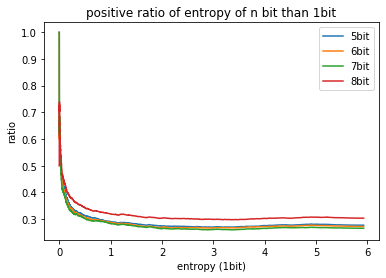

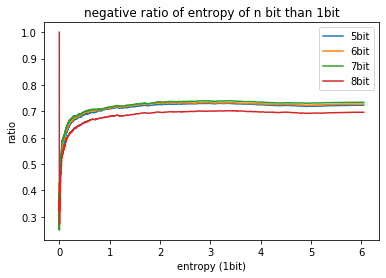

In [10]:
# 1bitと nbitのエントロピーの大小を比較（1bitエントロピー小さい順に）
fig1 = plt.figure()
ax1 = fig1.add_subplot(111)
fig2 = plt.figure()
ax2 = fig2.add_subplot(111)
for i in range(4, 8):
    n = i + 1
    positive = [[], []]
    negative = [[], []]
    posi_list = [[], []] 
    nega_list = [[], []]
    same = [[], []]
    p_total = np.empty(0)
    n_total = np.empty(0)
    t = 0
    for j in range(10000):
        en_1bit = sort_list[0][0][0][j]
        en_nbit = sort_list[0][i][0][j]
        t += 1
        if en_1bit < en_nbit:
            positive[0].append(en_1bit)
            positive[1].append(1)
            p_total = np.append(p_total, t)
        elif en_1bit > en_nbit:
            negative[0].append(en_1bit)
            negative[1].append(1)
            n_total = np.append(n_total, t)
    ax1.plot(positive[0], np.cumsum(positive[1])/p_total, label='{}bit'.format(n))
    ax2.plot(negative[0], np.cumsum(negative[1])/n_total, label='{}bit'.format(n))
    ax1.legend()
    ax2.legend()
    ax1.set_xlabel('entropy (1bit)')
    ax1.set_ylabel('ratio')
    ax2.set_xlabel('entropy (1bit)')
    ax2.set_ylabel('ratio')
    ax1.set_title('positive ratio of entropy of n bit than 1bit')
    ax2.set_title('negative ratio of entropy of n bit than 1bit')

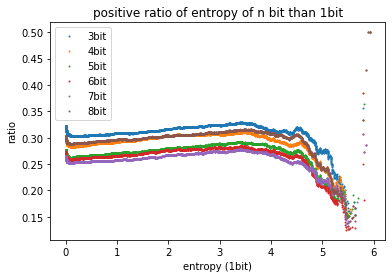

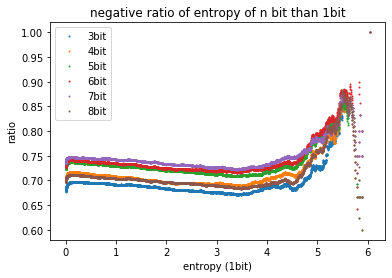

In [11]:
# 1bitと nbitのエントロピーの大小を比較（1bitエントロピー大きい順に）
fig1 = plt.figure()
ax1 = fig1.add_subplot(111)
fig2 = plt.figure()
ax2 = fig2.add_subplot(111)
for i in range(2, 8):
    n = i + 1
    positive = [[], []]
    negative = [[], []]
    posi_list = [[], []] 
    nega_list = [[], []]
    same = [[], []]
    p_total = np.empty(0)
    n_total = np.empty(0)
    t = 0
    for j in range(1, 10001):
        en_1bit = sort_list[0][0][0][-j]
        en_nbit = sort_list[0][i][0][-j]
        t += 1
        if en_1bit < en_nbit:
            positive[0].append(en_1bit)
            positive[1].append(1)
            p_total = np.append(p_total, t)
        elif en_1bit > en_nbit:
            negative[0].append(en_1bit)
            negative[1].append(1)
            n_total = np.append(n_total, t)
    ax1.plot(positive[0], np.cumsum(positive[1])/p_total, label='{}bit'.format(n), linewidth=0, marker='o', markersize=1)
    ax2.plot(negative[0], np.cumsum(negative[1])/n_total, label='{}bit'.format(n), linewidth=0, marker='o', markersize=1)
    ax1.legend()
    ax2.legend()
    ax1.set_xlabel('entropy (1bit)')
    ax1.set_ylabel('ratio')
    ax2.set_xlabel('entropy (1bit)')
    ax2.set_ylabel('ratio')
    ax1.set_title('positive ratio of entropy of n bit than 1bit')
    ax2.set_title('negative ratio of entropy of n bit than 1bit')

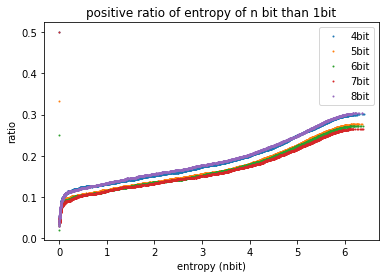

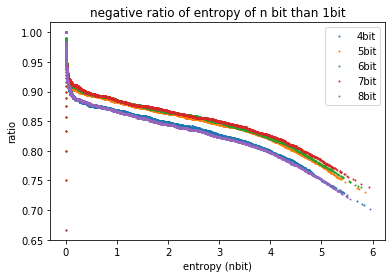

In [12]:
# 1bitと nbitのエントロピーの大小を比較（nbitエントロピー小さい順に）
fig1 = plt.figure()
ax1 = fig1.add_subplot(111)
fig2 = plt.figure()
ax2 = fig2.add_subplot(111)
for i in range(3, 8):
    n = i + 1
    positive = [[], []]
    negative = [[], []]
    posi_list = [[], []] 
    nega_list = [[], []]
    same = [[], []]
    p_total = np.empty(0)
    n_total = np.empty(0)
    t = 0
    for j in range(10000):
        en_1bit = sort_list[i][0][0][j]
        en_nbit = sort_list[i][i][0][j]
        t += 1
        if en_1bit < en_nbit:
            positive[0].append(en_nbit)
            positive[1].append(1)
            p_total = np.append(p_total, t)
        elif en_1bit > en_nbit:
            negative[0].append(en_nbit)
            negative[1].append(1)
            n_total = np.append(n_total, t)
    ax1.plot(positive[0], np.cumsum(positive[1])/p_total, label='{}bit'.format(n), linewidth=0, marker='o', markersize=1)
    ax2.plot(negative[0], np.cumsum(negative[1])/n_total, label='{}bit'.format(n), linewidth=0, marker='o', markersize=1)
    ax1.legend()
    ax2.legend()
    ax1.set_xlabel('entropy (nbit)')
    ax1.set_ylabel('ratio')
    ax2.set_xlabel('entropy (nbit)')
    ax2.set_ylabel('ratio')
    ax1.set_title('positive ratio of entropy of n bit than 1bit')
    ax2.set_title('negative ratio of entropy of n bit than 1bit')

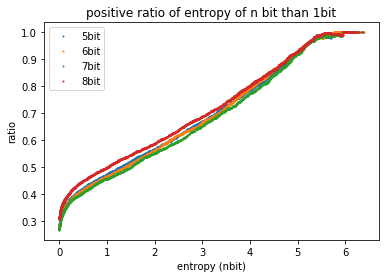

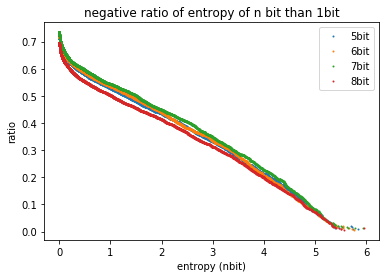

In [13]:
# 1bitと nbitのエントロピーの大小を比較（nbitエントロピー大きい順に）
fig1 = plt.figure()
ax1 = fig1.add_subplot(111)
fig2 = plt.figure()
ax2 = fig2.add_subplot(111)
for i in range(4, 8):
    n = i + 1
    positive = [[], []]
    negative = [[], []]
    posi_list = [[], []] 
    nega_list = [[], []]
    same = [[], []]
    p_total = np.empty(0)
    n_total = np.empty(0)
    t = 0
    for j in range(1, 10001):
        en_1bit = sort_list[i][0][0][-j]
        en_nbit = sort_list[i][i][0][-j]
        t += 1
        if en_1bit < en_nbit:
            positive[0].append(en_nbit)
            positive[1].append(1)
            p_total = np.append(p_total, t)
        elif en_1bit > en_nbit:
            negative[0].append(en_nbit)
            negative[1].append(1)
            n_total = np.append(n_total, t)
    ax1.plot(positive[0], np.cumsum(positive[1])/p_total, label='{}bit'.format(n), linewidth=0, marker='o', markersize=1)
    ax2.plot(negative[0], np.cumsum(negative[1])/n_total, label='{}bit'.format(n), linewidth=0, marker='o', markersize=1)
    ax1.legend()
    ax2.legend()
    ax1.set_xlabel('entropy (nbit)')
    ax1.set_ylabel('ratio')
    ax2.set_xlabel('entropy (nbit)')
    ax2.set_ylabel('ratio')
    ax1.set_title('positive ratio of entropy of n bit than 1bit')
    ax2.set_title('negative ratio of entropy of n bit than 1bit')

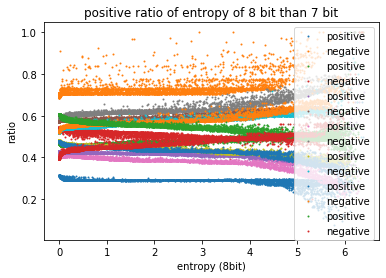

In [14]:
# n bitと m bit(m=n+1)のエントロピーの大小を比較（mbitエントロピー大きい順に）
for i in range(0, 7):
    n = i + 1
    m = i + 2
    positive = [[], []]
    negative = [[], []]
    posi_list = [[], []] 
    nega_list = [[], []]
    p_total = np.empty(0)
    n_total = np.empty(0)
    t = 0
    for j in range(1, 10001):
        en_nbit = sort_list[i][i][0][-j]
        en_mbit = sort_list[i][i+1][0][-j]
        t += 1
        if en_nbit < en_mbit:
            positive[0].append(en_mbit)
            positive[1].append(1)
            p_total = np.append(p_total, t)
        elif en_nbit > en_mbit:
            negative[0].append(en_mbit)
            negative[1].append(1)
            n_total = np.append(n_total, t)
    plt.plot(positive[0], np.cumsum(positive[1])/p_total, label='positive', linewidth=0, marker='o', markersize=1)
    plt.plot(negative[0], np.cumsum(negative[1])/n_total, label='negative', linewidth=0, marker='o', markersize=1)
    plt.legend()
    plt.xlabel('entropy ({}bit)'.format(m))
    plt.ylabel('ratio')
    plt.title('positive ratio of entropy of {} bit than {} bit'.format(m, n))

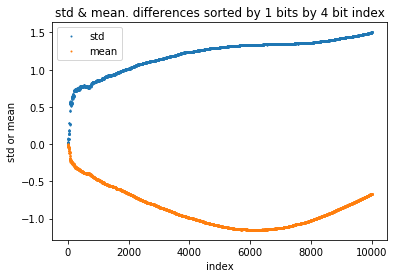

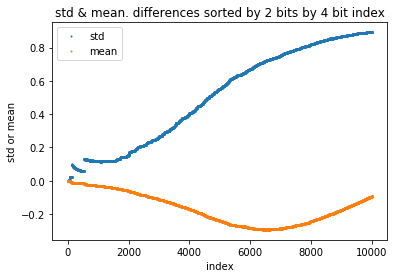

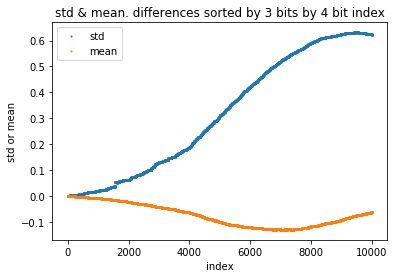

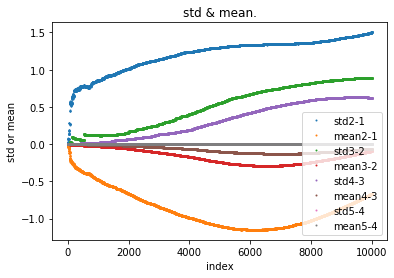

In [15]:
x_axi = np.arange(10000)
test_std = np.zeros([10000])
test_var = np.zeros([10000])
test_mean = np.zeros([10000])

n = 3
for i in range(n):
    tmp = sort_list[n][n][0] - sort_list[n][i][0]
    for j in range(1,len(test_std)):
        test_std[j] = tmp[:j].std()
        test_mean[j] = tmp[:j].mean()
    plt.title("std & mean. differences sorted by %s bits by %s bit index" % (i+1, n+1))
    plt.plot(x_axi, test_std, label="std", linewidth=0, marker='o', markersize=1)
    plt.plot(x_axi, test_mean, label="mean", linewidth=0, marker='o', markersize=1)
    plt.legend()
    plt.xlabel("index")
    plt.ylabel("std or mean")
    plt.show()

for i in range(4):
    tmp = sort_list[n][n][0] - sort_list[n][i][0]
    for j in range(1,len(test_mean)):
        test_std[j] = tmp[:j].std()
        test_mean[j] = tmp[:j].mean()
    plt.title("std & mean.")
    plt.plot(x_axi, test_std, label="std%s-%s" % (i+2, i+1), linewidth=0, marker='o', markersize=1)
    plt.plot(x_axi, test_mean, label="mean%s-%s" % (i+2, i+1), linewidth=0, marker='o', markersize=1)
plt.legend()
plt.xlabel("index")
plt.ylabel("std or mean")
plt.show()
    
# for i in range(1,len(test)):
#     test_std[i] = tmp[:i].std()
#     test_mean[i] = tmp[:i].mean()

# plt.plot(x_axi, test_std, label="std", linewidth=0, marker='o', markersize=1)
# plt.plot(x_axi, test_mean, label="mean", linewidth=0, marker='o', markersize=1)
# plt.legend()
# plt.xlabel("index")
# plt.show()

162.0
1.4224281222344148
5457.0
0.8668628189260685
8829.0
0.6245258231256012


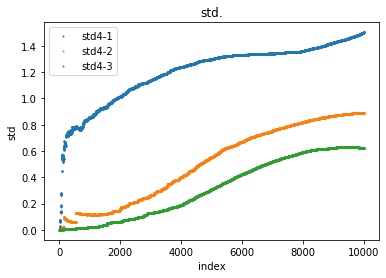

1.9263238496108541
0.7145812625822734
0.37582556609145523


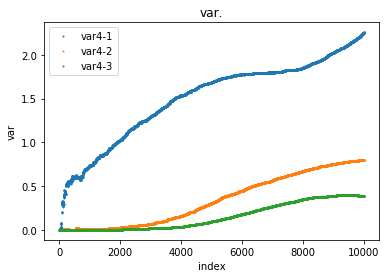

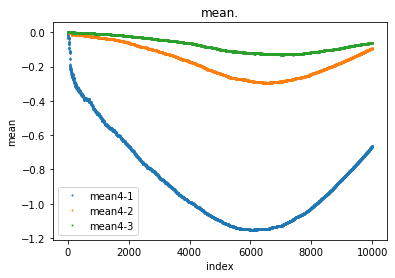

In [16]:
# 差分の標準偏差と分散

# 偏差と分散の条件
# th_std = 0.54
th_std = 0.62
th_var = 0.30
th_list_std = np.zeros([7])
th_list_var = np.zeros([7])
n = 3
# std
for i in range(n):
    tmp = sort_list[n][n][0] - sort_list[n][i][0]
    for j in range(1,len(test_std)):        
        test_std[j] = tmp[:j].std()
        if tmp[:j].std() < th_std:
            th_list_std[i] = j
#             test_mean[j] = tmp[:j].mean()
    print(th_list_std[i])
    plt.title("std.")
    plt.plot(x_axi, test_std, label="std%s-%s" % (n+1, i+1), linewidth=0, marker='o', markersize=1)
#     plt.plot(x_axi, test_mean, label="mean%s-%s" % (i+2, i+1), linewidth=0, marker='o', markersize=1)
    print(test_std[9000])
plt.legend()
plt.xlabel("index")
plt.ylabel("std")
# if save:
#     plt.savefig("fig/std.png")
plt.show()

# var
for i in range(n):
    tmp = sort_list[n][n][0] - sort_list[n][i][0]
    for j in range(1,len(test_var)):        
        test_var[j] = tmp[:j].var()
        if tmp[:j].var() < th_var:
            th_list_var[i] = j
#         test_mean[j] = tmp[:j].mean()
    plt.title("var.")
    plt.plot(x_axi, test_var, label="var%s-%s" % (n+1, i+1), linewidth=0, marker='o', markersize=1)
#     plt.plot(x_axi, test_mean, label="mean%s-%s" % (i+2, i+1), linewidth=0, marker='o', markersize=1)
    print(test_var[8500])
plt.legend()
plt.xlabel("index")
plt.ylabel("var")
# if save:
#     plt.savefig("fig/var.png")
plt.show()

# mean
for i in range(n):
    tmp = sort_list[n][n][0] - sort_list[n][i][0]
    for j in range(1,len(test_mean)):
#         test_std[j] = tmp[:j].std()
        test_mean[j] = tmp[:j].mean()
    plt.title("mean.")
#     plt.plot(x_axi, test_std, label="std%s-%s" % (i+2, i+1), linewidth=0, marker='o', markersize=1)
    plt.plot(x_axi, test_mean, label="mean%s-%s" % (n+1, i+1), linewidth=0, marker='o', markersize=1)
plt.legend()
plt.xlabel("index")
plt.ylabel("mean")
# if save:
#     plt.savefig("fig/mean.png")
plt.show()

(4, 1796)


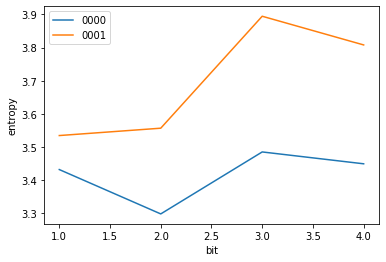

In [17]:
# a = np.zeros((2, 2, 2, 2, ))
x_ax = np.arange(1, 5)
n = 100
nnnn = [[], [], [], []]
nnnp = [[], [], [], []]
for j in range(10000):
    if (sort_list[0][0][1][j] == 0) and (sort_list[0][1][1][j] == 0) and (sort_list[0][2][1][j] == 0) and (sort_list[0][3][1][j] == 0):
        nnnn[0].append(sort_list[0][0][0][j])
        nnnn[1].append(sort_list[0][1][0][j])
        nnnn[2].append(sort_list[0][2][0][j])
        nnnn[3].append(sort_list[0][3][0][j])
    elif (sort_list[0][0][1][j] == 0) and (sort_list[0][1][1][j] == 0) and (sort_list[0][2][1][j] == 0) and (sort_list[0][3][1][j] == 1):
        nnnp[0].append(sort_list[0][0][0][j])
        nnnp[1].append(sort_list[0][1][0][j])
        nnnp[2].append(sort_list[0][2][0][j])
        nnnp[3].append(sort_list[0][3][0][j])
print(np.shape(nnnn))
# for i in range(0, np.array(nnnn).shape[1], int(np.array(nnnn).shape[1]/n)):
#     plt.plot(x_ax, np.array(nnnn)[:,i])
plt.plot(x_ax, [sum(nnnn[0])/len(nnnn[0]),sum(nnnn[1])/len(nnnn[1]),sum(nnnn[2])/len(nnnn[2]),sum(nnnn[3])/len(nnnn[3])], label='0000')
plt.plot(x_ax, [sum(nnnp[0])/len(nnnp[0]),sum(nnnp[1])/len(nnnp[1]),sum(nnnp[2])/len(nnnp[2]),sum(nnnp[3])/len(nnnp[3])], label='0001')
plt.xlabel('bit')
plt.ylabel('entropy')
# for j in range(int(10000/n), 10000, n):
#     for i in range(4):
#         a[i] = sort_list[0][i][0][j]
#     plt.plot(x_ax, a, label='{}'.format(j))
plt.legend()

1796
148
123
315
119
93
83
1222


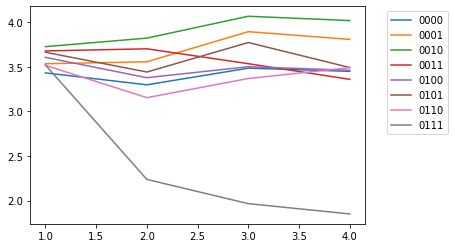

In [18]:
value_list = [[[], [], [], []],[[], [], [], []],[[], [], [], []],[[], [], [], []],[[], [], [], []],[[], [], [], []],[[], [], [], []],[[], [], [], []],[[], [], [], []],[[], [], [], []],[[], [], [], []],[[], [], [], []],[[], [], [], []],[[], [], [], []],[[], [], [], []],[[], [], [], []]]
for j in range(10000):
    for a in range(2):
        for b in range(2):
            for c in range(2):
                for d in range(2):
                    if (sort_list[0][0][1][j] == a) and (sort_list[0][1][1][j] == b) and (sort_list[0][2][1][j] == c) and (sort_list[0][3][1][j] == d):
#                         print(int('%s%s%s%s' % (a,b,c,d), 2))
                        value_list[int('%s%s%s%s' % (a,b,c,d), 2)][0].append(sort_list[0][0][0][j])
                        value_list[int('%s%s%s%s' % (a,b,c,d), 2)][1].append(sort_list[0][1][0][j])
                        value_list[int('%s%s%s%s' % (a,b,c,d), 2)][2].append(sort_list[0][2][0][j])
                        value_list[int('%s%s%s%s' % (a,b,c,d), 2)][3].append(sort_list[0][3][0][j])
for i in range(8):
    v = format(i, 'b')
    plt.plot(x_ax, [sum(value_list[i][0])/len(value_list[i][0]), sum(value_list[i][1])/len(value_list[i][1]),sum(value_list[i][2])/len(value_list[i][2]),sum(value_list[i][3])/len(value_list[i][3])], label='{0:04}'.format(int(v)))
    print(len(value_list[i][0]))

plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')

202
31
34
152
73
53
67
5489


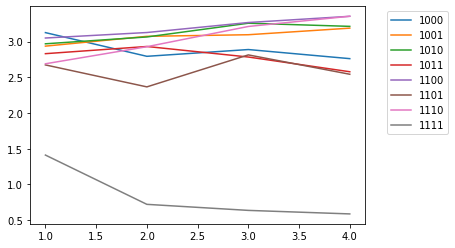

In [19]:
for i in range(8, 16):
    v = format(i, 'b')
    plt.plot(x_ax, [sum(value_list[i][0])/len(value_list[i][0]), sum(value_list[i][1])/len(value_list[i][1]),sum(value_list[i][2])/len(value_list[i][2]),sum(value_list[i][3])/len(value_list[i][3])], label='{0:04}'.format(int(v)))
    print(len(value_list[i][0]))
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')

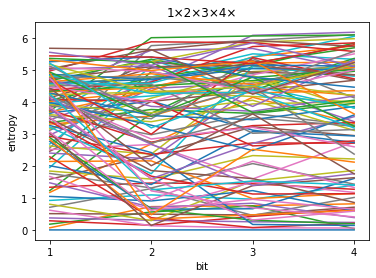

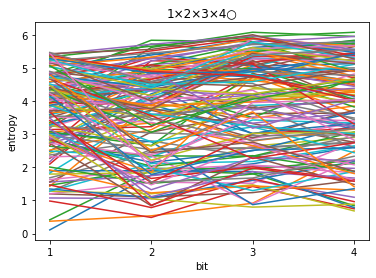

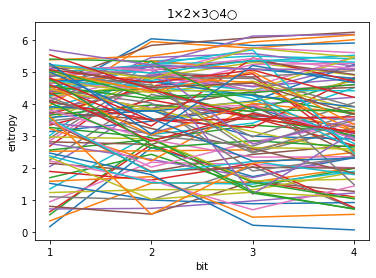

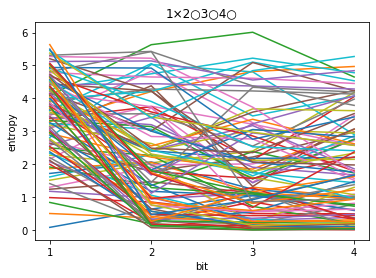

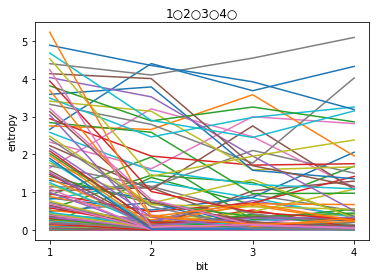

In [20]:
# plt.plot(x_ax, [sum(value_list[0][0]), sum(value_list[0][1]),sum(value_list[0][2]),sum(value_list[0][3])], label='0000', color='blue')
# plt.plot(x_ax, [sum(value_list[1][0])/len(value_list[1][0]), sum(value_list[1][1])/len(value_list[1][1]),sum(value_list[1][2])/len(value_list[1][2]),sum(value_list[1][3])/len(value_list[1][3])], label='0001')
# plt.plot(x_ax, [sum(value_list[3][0])/len(value_list[3][0]), sum(value_list[3][1])/len(value_list[3][1]),sum(value_list[3][2])/len(value_list[3][2]),sum(value_list[3][3])/len(value_list[3][3])], label='0011')
# plt.plot(x_ax, [sum(value_list[7][0])/len(value_list[7][0]), sum(value_list[7][1])/len(value_list[7][1]),sum(value_list[7][2])/len(value_list[7][2]),sum(value_list[7][3])/len(value_list[7][3])], label='0111')
# plt.plot(x_ax, [sum(value_list[15][0])/len(value_list[15][0]), sum(value_list[15][1])/len(value_list[15][1]),sum(value_list[15][2])/len(value_list[15][2]),sum(value_list[15][3])/len(value_list[15][3])], label='1111')
# plt.legend()
fig1 = plt.figure()
fig2 = plt.figure()
fig3 = plt.figure()
fig4 = plt.figure()
fig5 = plt.figure()
ax1 = fig1.add_subplot(111, xlabel='bit', ylabel='entropy', title='1×2×3×4×')
ax2 = fig2.add_subplot(111, xlabel='bit', ylabel='entropy', title='1×2×3×4○')
ax3 = fig3.add_subplot(111, xlabel='bit', ylabel='entropy', title='1×2×3○4○')
ax4 = fig4.add_subplot(111, xlabel='bit', ylabel='entropy', title='1×2○3○4○')
ax5 = fig5.add_subplot(111, xlabel='bit', ylabel='entropy', title='1○2○3○4○')
ax1.set_xticks([1,2,3,4])
ax2.set_xticks([1,2,3,4])
ax3.set_xticks([1,2,3,4])
ax4.set_xticks([1,2,3,4])
ax5.set_xticks([1,2,3,4])
n = 100

for j in range(0, len(value_list[0][0]), int(len(value_list[0][0])/n)):
    ax1.plot(x_ax, [value_list[0][0][j],value_list[0][1][j],value_list[0][2][j],value_list[0][3][j]])
for j in range(0, len(value_list[1][0]), int(len(value_list[1][0])/n)):
    ax2.plot(x_ax, [value_list[1][0][j],value_list[1][1][j],value_list[1][2][j],value_list[1][3][j]])
for j in range(0, len(value_list[3][0]), int(len(value_list[3][0])/n)):
    ax3.plot(x_ax, [value_list[3][0][j],value_list[3][1][j],value_list[3][2][j],value_list[3][3][j]])
for j in range(0, len(value_list[7][0]), int(len(value_list[7][0])/n)):
    ax4.plot(x_ax, [value_list[7][0][j],value_list[7][1][j],value_list[7][2][j],value_list[7][3][j]])
for j in range(0, len(value_list[15][0]), int(len(value_list[15][0])/n)):
    ax5.plot(x_ax, [value_list[15][0][j],value_list[15][1][j],value_list[15][2][j],value_list[15][3][j]])

In [21]:
a = []
b = []
c = []
d = []
e = []
for j in range(len(value_list[0][0])):
    a.append(value_list[0][1][j] - value_list[0][0][j])
for j in range(len(value_list[1][0])):
    b.append(value_list[1][1][j] - value_list[1][0][j])
for j in range(len(value_list[3][0])):
    c.append(value_list[3][1][j] - value_list[3][0][j])
for j in range(len(value_list[7][0])):
    d.append(value_list[7][1][j] - value_list[7][0][j])
for j in range(len(value_list[15][0])):
    e.append(value_list[15][1][j] - value_list[15][0][j])
print(len(a), len(b), len(c), len(d), len(e))

1796 148 315 1222 5489


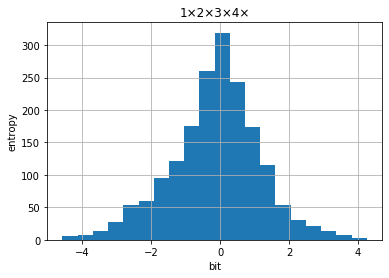

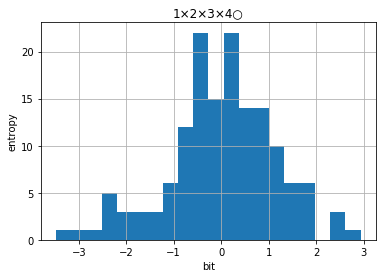

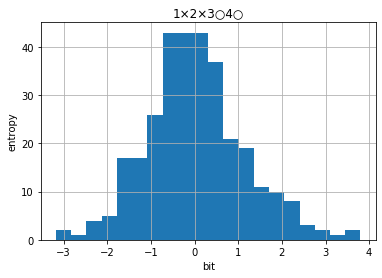

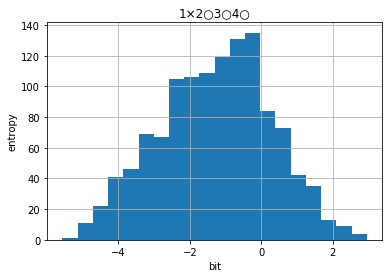

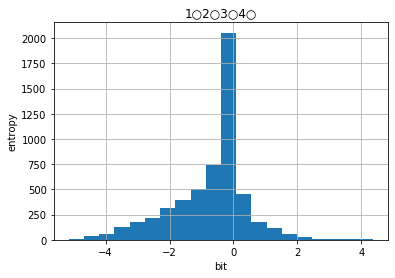

In [22]:
fig1 = plt.figure()
fig2 = plt.figure()
fig3 = plt.figure()
fig4 = plt.figure()
fig5 = plt.figure()
ax1 = fig1.add_subplot(111, xlabel='bit', ylabel='entropy', title='1×2×3×4×')
ax2 = fig2.add_subplot(111, xlabel='bit', ylabel='entropy', title='1×2×3×4○')
ax3 = fig3.add_subplot(111, xlabel='bit', ylabel='entropy', title='1×2×3○4○')
ax4 = fig4.add_subplot(111, xlabel='bit', ylabel='entropy', title='1×2○3○4○')
ax5 = fig5.add_subplot(111, xlabel='bit', ylabel='entropy', title='1○2○3○4○')
ax1.hist(a, bins=20)
ax2.hist(b, bins=20)
ax3.hist(c, bins=20)
ax4.hist(d, bins=20)
ax5.hist(e, bins=20)
ax1.grid()
ax2.grid()
ax3.grid()
ax4.grid()
ax5.grid()
fig1.show()
fig2.show()
fig3.show()
fig4.show()
fig5.show()

/artic/t-kaneko/.local/lib/python3.6/site-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


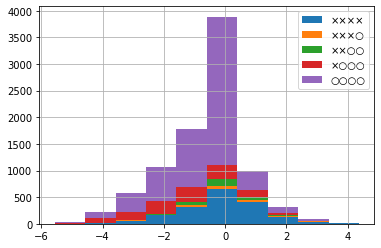

In [23]:
plt.hist([a,b,c,d,e], label=['××××','×××○','××○○','×○○○','○○○○'], stacked=True, bins=10)
plt.legend()
plt.grid()

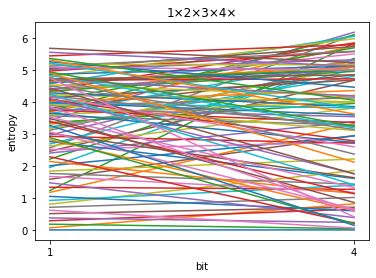

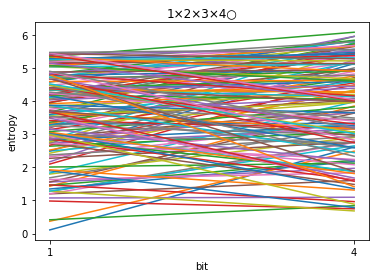

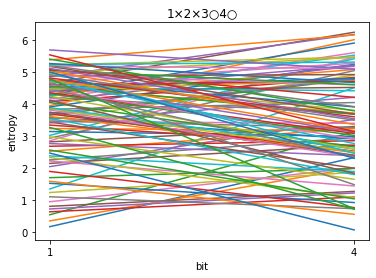

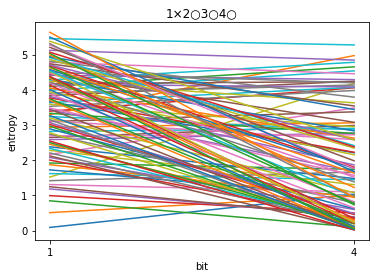

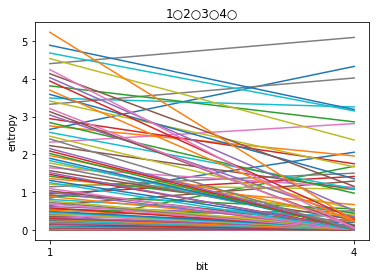

In [24]:
fig1 = plt.figure()
fig2 = plt.figure()
fig3 = plt.figure()
fig4 = plt.figure()
fig5 = plt.figure()
ax1 = fig1.add_subplot(111, xlabel='bit', ylabel='entropy', title='1×2×3×4×')
ax2 = fig2.add_subplot(111, xlabel='bit', ylabel='entropy', title='1×2×3×4○')
ax3 = fig3.add_subplot(111, xlabel='bit', ylabel='entropy', title='1×2×3○4○')
ax4 = fig4.add_subplot(111, xlabel='bit', ylabel='entropy', title='1×2○3○4○')
ax5 = fig5.add_subplot(111, xlabel='bit', ylabel='entropy', title='1○2○3○4○')
ax1.set_xticks([1,4])
ax2.set_xticks([1,4])
ax3.set_xticks([1,4])
ax4.set_xticks([1,4])
ax5.set_xticks([1,4])
for j in range(0, len(value_list[0][0]), int(len(value_list[0][0])/n)):
    ax1.plot([1,4], [value_list[0][0][j],value_list[0][3][j]])
for j in range(0, len(value_list[1][0]), int(len(value_list[1][0])/n)):
    ax2.plot([1,4], [value_list[1][0][j],value_list[1][3][j]])
for j in range(0, len(value_list[3][0]), int(len(value_list[3][0])/n)):
    ax3.plot([1,4], [value_list[3][0][j],value_list[3][3][j]])
for j in range(0, len(value_list[7][0]), int(len(value_list[7][0])/n)):
    ax4.plot([1,4], [value_list[7][0][j],value_list[7][3][j]])
for j in range(0, len(value_list[15][0]), int(len(value_list[15][0])/n)):
    ax5.plot([1,4], [value_list[15][0][j],value_list[15][3][j]])

In [25]:
a = []
b = []
c = []
d = []
e = []
for j in range(len(value_list[0][0])):
    a.append(value_list[0][3][j] - value_list[0][0][j])
for j in range(len(value_list[1][0])):
    b.append(value_list[1][3][j] - value_list[1][0][j])
for j in range(len(value_list[3][0])):
    c.append(value_list[3][3][j] - value_list[3][0][j])
for j in range(len(value_list[7][0])):
    d.append(value_list[7][3][j] - value_list[7][0][j])
for j in range(len(value_list[15][0])):
    e.append(value_list[15][3][j] - value_list[15][0][j])
print(len(a), len(b), len(c), len(d), len(e))

1796 148 315 1222 5489


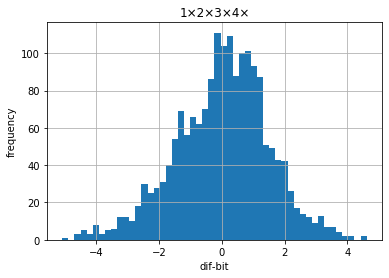

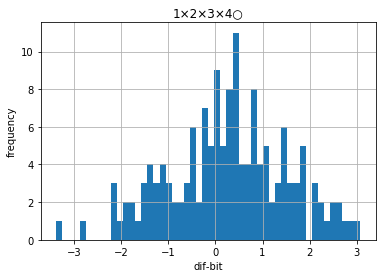

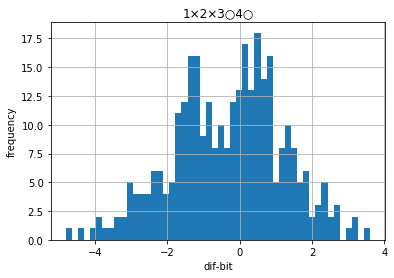

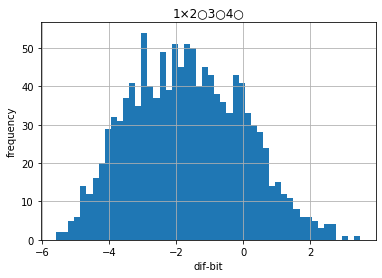

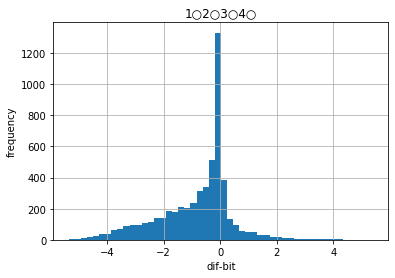

In [26]:
fig1 = plt.figure()
fig2 = plt.figure()
fig3 = plt.figure()
fig4 = plt.figure()
fig5 = plt.figure()
ax1 = fig1.add_subplot(111, xlabel='dif-bit', ylabel='frequency', title='1×2×3×4×')
ax2 = fig2.add_subplot(111, xlabel='dif-bit', ylabel='frequency', title='1×2×3×4○')
ax3 = fig3.add_subplot(111, xlabel='dif-bit', ylabel='frequency', title='1×2×3○4○')
ax4 = fig4.add_subplot(111, xlabel='dif-bit', ylabel='frequency', title='1×2○3○4○')
ax5 = fig5.add_subplot(111, xlabel='dif-bit', ylabel='frequency', title='1○2○3○4○')
ax1.hist(a, bins=50)
ax2.hist(b, bins=50)
ax3.hist(c, bins=50)
ax4.hist(d, bins=50)
ax5.hist(e, bins=50)
ax1.grid()
ax2.grid()
ax3.grid()
ax4.grid()
ax5.grid()
fig1.show()
fig2.show()
fig3.show()
fig4.show()
fig5.show()

/artic/t-kaneko/.local/lib/python3.6/site-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


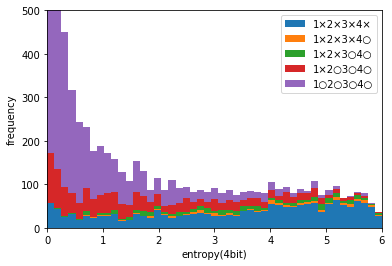

In [27]:
save = 1
ret = plt.hist([value_list[0][3],value_list[1][3],value_list[3][3],value_list[7][3],value_list[15][3]], bins=50, label=['1×2×3×4×','1×2×3×4○','1×2×3○4○','1×2○3○4○','1○2○3○4○'], stacked=True)
# plt.hist(value_list[1][3], bins=50)
# plt.hist(value_list[3][3], bins=50)
# plt.hist(value_list[7][3], bins=50)
# plt.hist(value_list[15][3], bins=50)
plt.legend()
plt.xlabel('entropy(4bit)')
plt.ylabel('frequency')
plt.xlim(0, 6)
plt.ylim(0,500)
if save:
    plt.savefig('fig/hist_difficult.pdf')

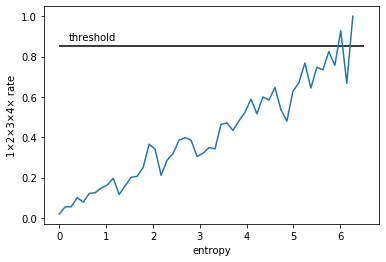

In [28]:
plt.plot(ret[1][:-1], ret[0][0]/ret[0][4])
plt.xlabel('entropy')
plt.ylabel('1×2×3×4× rate')
plt.hlines(0.85,0,6.5)
plt.text(0.2,0.88,'threshold')
plt.savefig('fig/all_miss_ent.pdf')
# plt.xlim(4,6)

In [29]:
th_ret = 0.65
th_retlist = []
tmp = ret[0][0]/ret[0][4]
for i in range(len(tmp)):
    if tmp[i] > th_ret:
        th_retlist.append(ret[1][i])
print(th_retlist[0])

5.116596601792298


In [30]:
# ソートした後半last_len枚の画像を対象にプロット
all_acc = [[], [], [], [], [], [], [], []]
acc_list = []
correct_list = []

for last_len in range(1, 5000):
#     last_len = 500

    for j, l in enumerate(orig_list):
#         tmp = l[:, l[0].argsort()].reshape(3, len(orig_list[0][1]))
        tmp = sort_list[3][j]
        correct = 0.
    #     acc = np.zeros([len(tmp[1])])
        acc = np.cumsum(tmp[1][-last_len:])
        for i in range(len(acc)):
    #         correct += tmp[1][i]
            acc[i] = acc[i] / (i+1)
        acc_list.append(acc)
        correct_list.append(correct)
        all_acc[j].append(acc[-1])
# plt.plot(all_acc)
# for i in range(len(acc_list)):
#     plt.plot(np.arange(last_len), acc_list[i], linewidth=0, marker='o', markersize=1, label='%sbit' % (i+1))
#     plt.title('%sbit' % (i+1))
#     plt.xlabel('index')
#     plt.ylabel('correct rate')
#     plt.show()

# for i in range(len(acc_list)):
#     plt.plot(np.arange(last_len), acc_list[i], linewidth=0, marker='o', markersize=1, label='%sbit' % (i+1))
# plt.title('last %s images' % last_len)
# plt.xlabel('index')
# plt.ylabel('correct rate')
# plt.legend()
# # if save:
# #     plt.savefig("fig/last-%s.png" % last_len)
# plt.show()

Text(0, 0.5, 'correct rate')

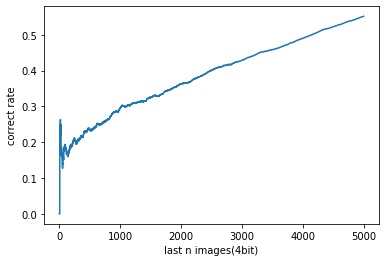

In [31]:
plt.plot(all_acc[3])
plt.xlabel('last n images(4bit)')
plt.ylabel('correct rate')

4.594108581542969
1165


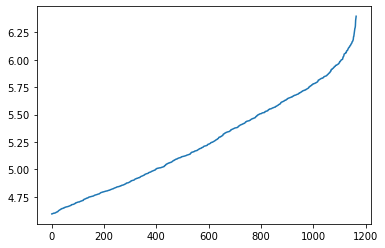

In [32]:
attenuation = 0.4
att_list = []
count = 0
for i, aa3 in enumerate(all_acc[3]):
    if aa3 < (0.7586 * attenuation):
        att_list.append(i)
        
high_e = sort_list[3][3][0][10000 - att_list[-1]]
a = []
for j in range(10000):
    if sort_list[3][3][0][j] > high_e:
        count += 1
print(high_e)
print(count)
plt.plot(sort_list[3][3][0][-count:])

In [33]:
value_list = [[[], [], [], []],[[], [], [], []],[[], [], [], []],[[], [], [], []],[[], [], [], []],[[], [], [], []],[[], [], [], []],[[], [], [], []],[[], [], [], []],[[], [], [], []],[[], [], [], []],[[], [], [], []],[[], [], [], []],[[], [], [], []],[[], [], [], []],[[], [], [], []]]
for j in range(10000-count, 10000):
    for a in range(2):
        for b in range(2):
            for c in range(2):
                for d in range(2):
                    if (sort_list[3][0][1][j] == a) and (sort_list[3][1][1][j] == b) and (sort_list[3][2][1][j] == c) and (sort_list[3][3][1][j] == d):
#                         print(int('%s%s%s%s' % (a,b,c,d), 2))
                        value_list[int('%s%s%s%s' % (a,b,c,d), 2)][0].append(sort_list[3][0][0][j])
                        value_list[int('%s%s%s%s' % (a,b,c,d), 2)][1].append(sort_list[3][1][0][j])
                        value_list[int('%s%s%s%s' % (a,b,c,d), 2)][2].append(sort_list[3][2][0][j])
                        value_list[int('%s%s%s%s' % (a,b,c,d), 2)][3].append(sort_list[3][3][0][j])
# for i in range(8):
#     v = format(i, 'b')
#     plt.plot(x_ax, [sum(value_list[i][0])/len(value_list[i][0]), sum(value_list[i][1])/len(value_list[i][1]),sum(value_list[i][2])/len(value_list[i][2]),sum(value_list[i][3])/len(value_list[i][3])], label='{0:04}'.format(int(v)))
#     print(len(value_list[i][0]))

# plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')

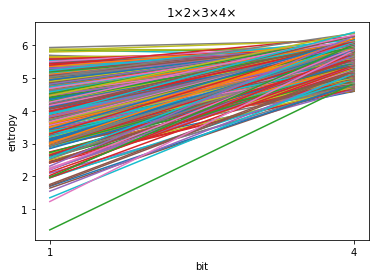

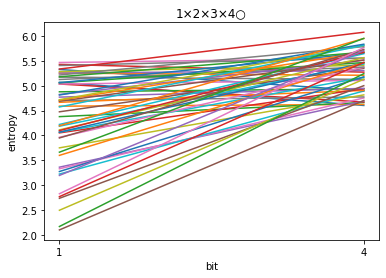

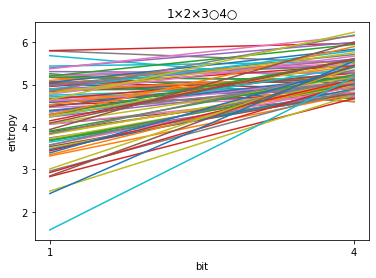

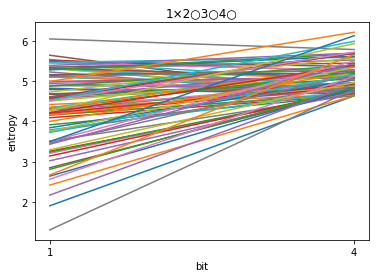

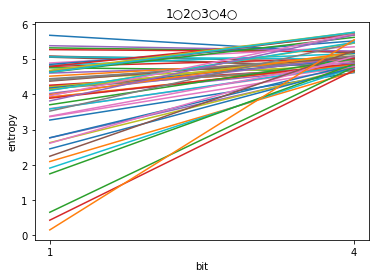

In [34]:
fig1 = plt.figure()
fig2 = plt.figure()
fig3 = plt.figure()
fig4 = plt.figure()
fig5 = plt.figure()
ax1 = fig1.add_subplot(111, xlabel='bit', ylabel='entropy', title='1×2×3×4×')
ax2 = fig2.add_subplot(111, xlabel='bit', ylabel='entropy', title='1×2×3×4○')
ax3 = fig3.add_subplot(111, xlabel='bit', ylabel='entropy', title='1×2×3○4○')
ax4 = fig4.add_subplot(111, xlabel='bit', ylabel='entropy', title='1×2○3○4○')
ax5 = fig5.add_subplot(111, xlabel='bit', ylabel='entropy', title='1○2○3○4○')
ax1.set_xticks([1,4])
ax2.set_xticks([1,4])
ax3.set_xticks([1,4])
ax4.set_xticks([1,4])
ax5.set_xticks([1,4])
for j in range(len(value_list[0][0])):
    ax1.plot([1,4], [value_list[0][0][j],value_list[0][3][j]])
for j in range(len(value_list[1][0])):
    ax2.plot([1,4], [value_list[1][0][j],value_list[1][3][j]])
for j in range(len(value_list[3][0])):
    ax3.plot([1,4], [value_list[3][0][j],value_list[3][3][j]])
for j in range(len(value_list[7][0])):
    ax4.plot([1,4], [value_list[7][0][j],value_list[7][3][j]])
for j in range(len(value_list[15][0])):
    ax5.plot([1,4], [value_list[15][0][j],value_list[15][3][j]])

610
54
89
92
60


/artic/t-kaneko/.local/lib/python3.6/site-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


Text(0, 0.5, 'frequency')

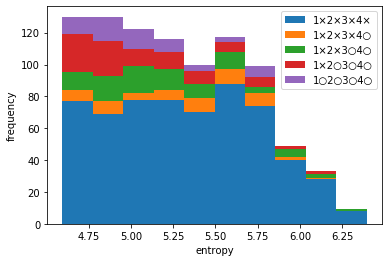

In [35]:
print(len(value_list[0][0]))
print(len(value_list[1][0]))
print(len(value_list[3][0]))
print(len(value_list[7][0]))
print(len(value_list[15][0]))
ret = plt.hist([value_list[0][3],value_list[1][3],value_list[3][3],value_list[7][3],value_list[15][3]], bins=10, label=['1×2×3×4×','1×2×3×4○','1×2×3○4○','1×2○3○4○','1○2○3○4○'], stacked=True)
# plt.hist(value_list[1][3], bins=50)
# plt.hist(value_list[3][3], bins=50)
# plt.hist(value_list[7][3], bins=50)
# plt.hist(value_list[15][3], bins=50)
plt.legend()
plt.xlabel('entropy')
plt.ylabel('frequency')
# plt.xlim(4, 6)
# plt.ylim(0,500)

In [36]:
a = []
b = []
c = []
d = []
e = []
for j in range(len(value_list[0][0])):
    a.append(value_list[0][3][j] - value_list[0][0][j])
for j in range(len(value_list[1][0])):
    b.append(value_list[1][3][j] - value_list[1][0][j])
for j in range(len(value_list[3][0])):
    c.append(value_list[3][3][j] - value_list[3][0][j])
for j in range(len(value_list[7][0])):
    d.append(value_list[7][3][j] - value_list[7][0][j])
for j in range(len(value_list[15][0])):
    e.append(value_list[15][3][j] - value_list[15][0][j])
print(len(a), len(b), len(c), len(d), len(e))

610 54 89 92 60


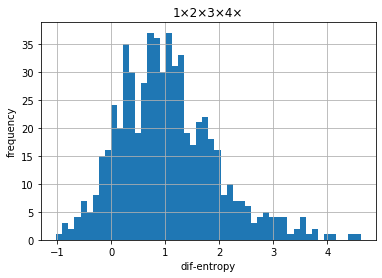

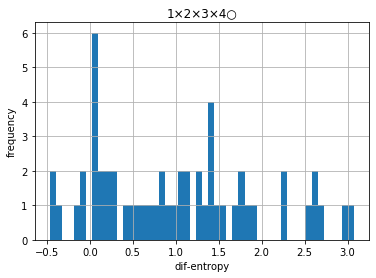

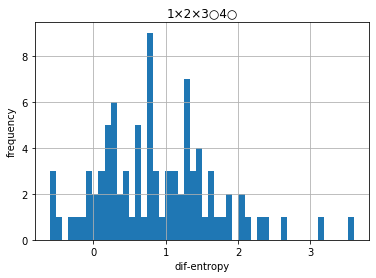

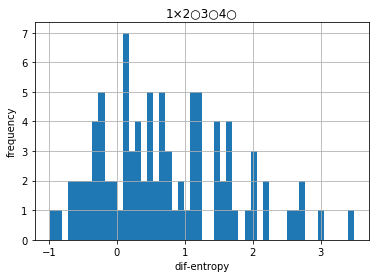

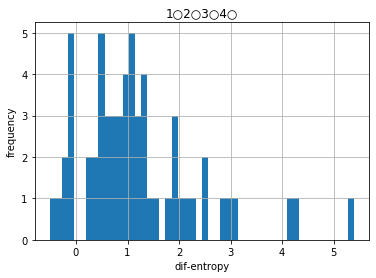

In [37]:
fig1 = plt.figure()
fig2 = plt.figure()
fig3 = plt.figure()
fig4 = plt.figure()
fig5 = plt.figure()
ax1 = fig1.add_subplot(111, xlabel='dif-entropy', ylabel='frequency', title='1×2×3×4×')
ax2 = fig2.add_subplot(111, xlabel='dif-entropy', ylabel='frequency', title='1×2×3×4○')
ax3 = fig3.add_subplot(111, xlabel='dif-entropy', ylabel='frequency', title='1×2×3○4○')
ax4 = fig4.add_subplot(111, xlabel='dif-entropy', ylabel='frequency', title='1×2○3○4○')
ax5 = fig5.add_subplot(111, xlabel='dif-entropy', ylabel='frequency', title='1○2○3○4○')
ax1.hist(a, bins=50)
ax2.hist(b, bins=50)
ax3.hist(c, bins=50)
ax4.hist(d, bins=50)
ax5.hist(e, bins=50)
ax1.grid()
ax2.grid()
ax3.grid()
ax4.grid()
ax5.grid()
fig1.show()
fig2.show()
fig3.show()
fig4.show()
fig5.show()

In [38]:
import numpy as np
import matplotlib.pyplot as plt
acc_list = np.load('numpy/list_data/pollux01/acc_list210118p.npy')
avg_bit_list = np.load('numpy/list_data/pollux01/avg_bit_list210118p.npy')
bit_1 = np.load('numpy/list_data/pollux01/bit1_1210118p.npy')
bit_2 = np.load('numpy/list_data/pollux01/bit2_1210118p.npy')
bit_3 = np.load('numpy/list_data/pollux01/bit3_1210118p.npy')
bit_4 = np.load('numpy/list_data/pollux01/bit4_1210118p.npy')
print(acc_list)
print(avg_bit_list)
avg_bit_list[2] = 0.5
base_acc = [64.6, 75.7, 77.4, 78.0]
show_bit = 4

# plt.plot((np.arange(len(base_acc))+1)[:show_bit], base_acc[:show_bit], linewidth=2, label='baseline', marker='o', markersize=4)
plt.plot(avg_bit_list, acc_list, markersize=100, label='dynamic bit-precision')

FileNotFoundError: [Errno 2] No such file or directory: 'numpy/list_data/pollux01/acc_list210118p.npy'